In [5]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
import os
import pprint


%matplotlib inline
path=r"D:\Image_datasets\celebrity_faces\misc\selena.jpg"

In [16]:
def get_image(image_path,new_shape=(3,3),plot_original=False,plot_resized=True):
    image_path=image_path.replace("\\","/")
    print(image_path)
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    resized_image = cv2.resize(image, new_shape, interpolation = cv2.INTER_AREA)
    flatten_image = resized_image.reshape(resized_image.shape[0]*resized_image.shape[1], 3)
    
    if plot_original:
        plt.axis('off')
        plt.imshow(image)
        plt.title("Inserted image : "+image_path.split("/")[-1])
        
    if plot_resized:
        plt.axis('off')
        plt.imshow(resized_image)
        plt.title("Inserted image : "+image_path.split("/")[-1])
        plt.show()
    return resized_image,flatten_image



def get_nearest_colors(act_color,rest_color):
    all_dist=[]
    for rcolor in rest_color:
        rdiff=act_color[0]-rcolor[0]
        gdiff=act_color[1]-rcolor[1];
        bdiff=act_color[2]-rcolor[2];
        distance = rdiff**2 + gdiff**2 + bdiff**2
        if distance<=10000:
            all_dist.append(rcolor)
    print(act_color,all_dist, len(all_dist))

    
    
def get_dominent_color(path):
    modified_image,image_pixels=get_image(path)
    
    value_list=[]
    
    for i in range(len(image_pixels)):
        temp_list=image_pixels.tolist()
        temp_list.pop(i)
        get_nearest_colors(image_pixels[i],temp_list)


D:/Image_datasets/celebrity_faces/misc/selena.jpg


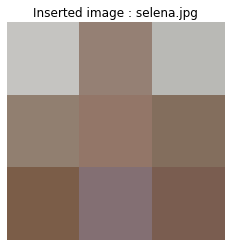

[197 196 193] [[185, 185, 181]] 1
[149 128 116] [[185, 185, 181], [145, 127, 112], [147, 118, 104], [131, 110, 93], [123, 93, 72], [131, 111, 115], [122, 93, 80]] 7
[185 185 181] [[197, 196, 193], [149, 128, 116], [145, 127, 112]] 3
[145 127 112] [[149, 128, 116], [185, 185, 181], [147, 118, 104], [131, 110, 93], [123, 93, 72], [131, 111, 115], [122, 93, 80]] 7
[147 118 104] [[149, 128, 116], [145, 127, 112], [131, 110, 93], [123, 93, 72], [131, 111, 115], [122, 93, 80]] 6
[131 110  93] [[149, 128, 116], [145, 127, 112], [147, 118, 104], [123, 93, 72], [131, 111, 115], [122, 93, 80]] 6
[123  93  72] [[149, 128, 116], [145, 127, 112], [147, 118, 104], [131, 110, 93], [131, 111, 115], [122, 93, 80]] 6
[131 111 115] [[149, 128, 116], [145, 127, 112], [147, 118, 104], [131, 110, 93], [123, 93, 72], [122, 93, 80]] 6
[122  93  80] [[149, 128, 116], [145, 127, 112], [147, 118, 104], [131, 110, 93], [123, 93, 72], [131, 111, 115]] 6


In [17]:
get_dominent_color(path)